### Algorithm: CNN-1D including and data engineering
### Dataset: Libras
### Authors: Edgar Acuna  
### Created: April 4, 2025

In [302]:
import tensorflow

In [303]:
# cnn lstm model
from numpy import mean
from numpy import std, unique
from numpy import dstack
from pandas import read_csv
from matplotlib import pyplot

from sklearn.metrics import classification_report, confusion_matrix, f1_score, precision_score, roc_auc_score, ConfusionMatrixDisplay
import tensorflow.keras.layers as layers
import keras
#from keras.layers import TimeDistributed
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv1D, MaxPooling1D, LSTM, TimeDistributed
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from keras.utils import to_categorical

In [304]:
import pandas as pd
from aeon.datasets import load_classification
from sklearn import preprocessing
from matplotlib import pyplot

def load_data(dataset, split="Train"):
    if split=="Train":
        X, y = load_classification(dataset, split="Train")
    else:
        X, y = load_classification(dataset, split="Test")
    print(" Shape of X = ", X.shape)
    print(" Shape of y = ", y.shape)
    #Swap dimensions so features are the third dimension
    X = X.swapaxes(1, 2)
    print(" New shape of X = ", X.shape)
    #prepare y
    y = pd.DataFrame(y)
    enc = preprocessing.OneHotEncoder(dtype=int)
    enc.fit(y)
    y = enc.transform(y).toarray()
    print(" New shape of y = ", y.shape)
    return X, y


In [305]:
# loading Training data
X, y = load_data("Libras",split="Train")

 Shape of X =  (180, 2, 45)
 Shape of y =  (180,)
 New shape of X =  (180, 45, 2)
 New shape of y =  (180, 15)


In [306]:
import numpy as np
yo=np.argmax(y,axis=1)
yo=np.array(yo,dtype=int)
print(yo)

[ 0  0  0  0  0  0  0  0  0  0  0  0  7  7  7  7  7  7  7  7  7  7  7  7
  8  8  8  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9  9  9  9  9  9  9
 10 10 10 10 10 10 10 10 10 10 10 10 11 11 11 11 11 11 11 11 11 11 11 11
 12 12 12 12 12 12 12 12 12 12 12 12 13 13 13 13 13 13 13 13 13 13 13 13
 14 14 14 14 14 14 14 14 14 14 14 14  1  1  1  1  1  1  1  1  1  1  1  1
  2  2  2  2  2  2  2  2  2  2  2  2  3  3  3  3  3  3  3  3  3  3  3  3
  4  4  4  4  4  4  4  4  4  4  4  4  5  5  5  5  5  5  5  5  5  5  5  5
  6  6  6  6  6  6  6  6  6  6  6  6]


In [307]:
# loading Testing data
Xt, yt = load_data("Libras",split="Test")

 Shape of X =  (180, 2, 45)
 Shape of y =  (180,)
 New shape of X =  (180, 45, 2)
 New shape of y =  (180, 15)


In [308]:
yto=np.argmax(yt,axis=1)
yto=np.array(yto,dtype=int)
#print(yto)

In [309]:
#class size in testing
import numpy as np
np.sum(yt,axis=0)

array([12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12])

In [310]:
Xtb=Xt

In [311]:
import numpy as np
m=X.mean(axis=0)
s=X.std(axis=0)
X=(X-m)/s
Xt=(Xt-m)/s

In [312]:
import time
#trainX, trainy, testX, testy = trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.2, random_state=42)
#print(trainX.shape)
#print("trainy",trainy.shape)
trainX=X
trainy=y
testX=Xt
testy=yt
verbose, epochs, batch_size = 0, 300, 32
n_timesteps, n_features, n_outputs = trainX.shape[1], trainX.shape[2], trainy.shape[1]
print(n_timesteps,n_features,n_outputs)
model = keras. Sequential()
model.add(keras.Input(shape=(n_timesteps,n_features)))
model.add(Conv1D(16, 2, activation="relu"))
model.add(MaxPooling1D(pool_size=2))
#model.add(Dropout(0.5))
model.add(Conv1D(32, 2, activation="relu"))
model.add(MaxPooling1D(pool_size=2))
#model.add(Dropout(0.5))
model.add(Conv1D(64, 2, activation="relu"))
model.add(MaxPooling1D(pool_size=2))
#model.add(Dropout(0.5))
#model.add(Conv1D(128, 3, activation="relu", input_shape=(n_timesteps,n_features)))
#model.add(MaxPooling1D(pool_size=3))
#model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(15, activation = 'softmax'))
start_time = time.time()
model.compile(loss = 'categorical_crossentropy', optimizer = "adam", metrics = ['accuracy'])
model.summary()
model.fit(trainX, trainy, epochs=300, batch_size=8, verbose=1)
#model.fit(xtrain, ytrain, batch_size=256,epochs=25,  validation_split=.2, verbose=1)
acc = model.evaluate(trainX, trainy)
print("Loss:", acc[0], " Accuracy:", acc[1])
print("Training time --- %s seconds ---" % (time.time() - start_time))

45 2 15


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_30 (Conv1D)              │ (None, 44, 16)         │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_30 (MaxPooling1D) │ (None, 22, 16)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_31 (Conv1D)              │ (None, 21, 32)         │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_31 (MaxPooling1D) │ (None, 10, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_32 (Conv1D)              │ (None, 9, 64)          │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_32 (MaxPooling1D) │ (None, 4, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_10 (Flatten)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 15)             │           975 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 113,215 (442.25 KB)

 Trainable params: 113,215 (442.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/300
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0864 - loss: 2.6855  
Epoch 2/300
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3128 - loss: 2.4030 
Epoch 3/300
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3991 - loss: 1.7759 
Epoch 4/300
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5561 - loss: 1.4067 
Epoch 5/300
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6635 - loss: 0.9504 
Epoch 6/300
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6853 - loss: 0.8680 
Epoch 7/300
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7319 - loss: 0.6869 
Epoch 8/300
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7856 - loss: 0.5607 
Epoch 9/300
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7208 - loss: 0.7131 
Epoch 10/300
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7883 - loss: 0.5367 
Epoch 11/300
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8684 - loss: 0.3709 
Epoch 12/300
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

In [313]:
model.evaluate(testX, testy, verbose=1)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7626 - loss: 1.5397 


[1.8618708848953247, 0.7388888597488403]

In [314]:
#Computing F1-score
import numpy as np
import sklearn
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix, f1_score, precision_score, roc_auc_score
train_features = np.array(trainX)
test_features = np.array(testX)
train_labels=np.array(trainy)
#train_labels=pd.DataFrame(trainy)
#n_values = train_labels.idxmax(axis=1)
y_values=np.argmax(train_labels,axis=1)
#print(y_values)
test_labels=np.array(testy)
yt_values=np.argmax(test_labels,axis=1)
#train_predictions_baseline = model.predict_classes(train_features, batch_size=150)
a=model.predict([test_features])
predict_classes=np.argmax(a,axis=1)
th=.8
atempo=a.max(axis=1)
print(atempo.shape)
print('Rate of Probability of classification exceeding a threshold in test',(atempo[atempo>th].shape[0])/atempo.shape[0])
#prob2=pd.DataFrame(model.predict_proba(test_features,batch_size=150))
#a=prob2.max(axis=1)
#print('Probability of classification',(a[a>.80].shape[0])/prob2.shape[0])
#print('Rate of Probability of classification exceding a trhershold',(a[a>.50].shape[0])/a.shape[0])
a1=model.predict([train_features])
predict_classes1=np.argmax(a1,axis=1)
#f1_train=sklearn.metrics.f1_score(ytrain, train_predictions_baseline, average="weighted")
#test_predictions_baseline = model.predict_classes(test_features, batch_size=150)
#print(test_predictions_baseline)
#f1_test=sklearn.metrics.f1_score(test_labels, test_predictions_baseline, average="weighted")
#print('f1_scores in testing set',f1_test)
#Calculating metrics for each class
print("EVALUATION ON TESTING DATA")
print(classification_report(yt_values, predict_classes))

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
(180,)
Rate of Probability of classification exceeding a threshold in test 0.8944444444444445
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step

C:\Users\User\anaconda3\Lib\site-packages\keras\src\models\functional.py:238: UserWarning:

The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor_670
Received: inputs=('Tensor(shape=(32, 45, 2))',)

C:\Users\User\anaconda3\Lib\site-packages\keras\src\models\functional.py:238: UserWarning:

The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor_670
Received: inputs=('Tensor(shape=(None, 45, 2))',)



6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
EVALUATION ON TESTING DATA
              precision    recall  f1-score   support

           0       0.90      0.75      0.82        12
           1       0.60      0.75      0.67        12
           2       0.54      0.58      0.56        12
           3       0.75      0.75      0.75        12
           4       0.56      0.42      0.48        12
           5       1.00      0.67      0.80        12
           6       0.79      0.92      0.85        12
           7       0.82      0.75      0.78        12
           8       0.92      0.92      0.92        12
           9       0.90      0.75      0.82        12
          10       0.91      0.83      0.87        12
          11       0.53      0.67      0.59        12
          12       0.90      0.75      0.82        12
          13       0.73      0.67      0.70        12
          14       0.58      0.92      0.71        12

    accuracy                           0.74       180
   macro avg   

In [315]:
cm=confusion_matrix(yt_values, predict_classes)
print(cm)
good=np.diag(cm)/np.unique(yt_values,return_counts=True)[1]
print(good)

[[ 9  1  0  0  0  0  0  2  0  0  0  0  0  0  0]
 [ 0  9  0  2  0  0  0  0  0  0  0  0  1  0  0]
 [ 0  0  7  0  3  0  0  0  0  0  0  0  0  2  0]
 [ 0  3  0  9  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  6  0  5  0  0  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  8  0  0  0  0  1  3  0  0  0]
 [ 0  0  0  0  0  0 11  0  0  0  0  0  0  0  1]
 [ 1  0  0  0  0  0  0  9  0  0  0  0  0  0  2]
 [ 0  0  0  0  0  0  0  0 11  0  0  1  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  9  0  2  0  0  1]
 [ 0  0  0  0  0  0  0  0  0  0 10  1  0  0  1]
 [ 0  2  0  1  0  0  0  0  0  1  0  8  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  9  0  3]
 [ 0  0  0  0  1  0  2  0  1  0  0  0  0  8  0]
 [ 0  0  0  0  0  0  1  0  0  0  0  0  0  0 11]]
[0.75       0.75       0.58333333 0.75       0.41666667 0.66666667
 0.91666667 0.75       0.91666667 0.75       0.83333333 0.66666667
 0.75       0.66666667 0.91666667]


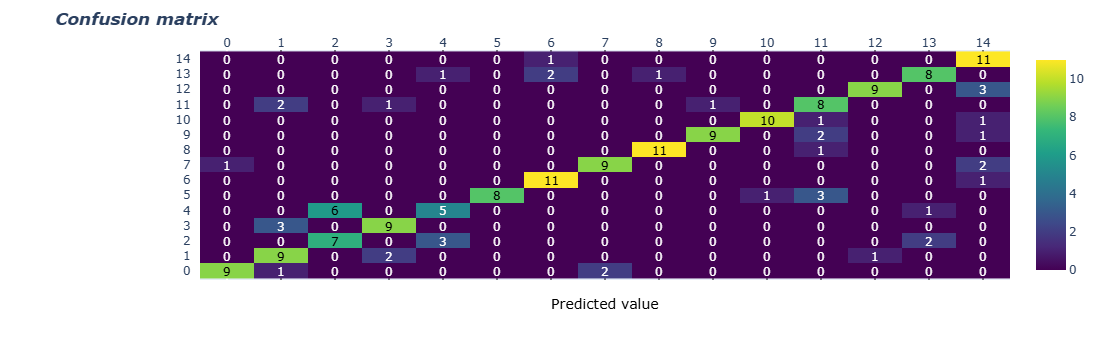

In [316]:
import plotly.figure_factory as ff
# invert z idx values

z= cm

# invert z idx values
#z = z[::-1]

x= [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14]
y1=x
#y =x[::-1].copy() # invert idx values of x
#print(y)
#y=x
# change each element of z to type string for annotations
z_text = [[str(y1) for y1 in x] for x in z]

# set up figure
fig = ff.create_annotated_heatmap(z, x=x, y=y1, annotation_text=z_text, colorscale='Viridis')

# add title
fig.update_layout(title_text='<i><b>Confusion matrix</b></i>',
                  #xaxis = dict(title='x'),
                  #yaxis = dict(title='x')
                 )

# add custom xaxis title
fig.add_annotation(dict(font=dict(color="black",size=14),
                        x=0.5,
                        y=-0.15,
                        showarrow=False,
                        text="Predicted value",
                        xref="paper",
                        yref="paper"))

# add custom yaxis title
fig.add_annotation(dict(font=dict(color="black",size=14),
                        x=-0.35,
                        y=0.5,
                        showarrow=False,
                        text="Actual value",
                        textangle=-90,
                        xref="paper",
                        yref="paper"))

# adjust margins to make room for yaxis title
fig.update_layout(margin=dict(t=50, l=200))

# add colorbar
fig['data'][0]['showscale'] = True
fig.show()

In [317]:
results1=model.evaluate(Xtb, yt, verbose=1)
print(results1)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.1559 - loss: 8.0439
[7.226418495178223, 0.1666666716337204]
